In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Import patient data
df1 = pd.read_csv('patient.csv')
df1.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [ ]:
#Meaning of each column
id : The ID of the patient (n-th confirmed patient)
sex : The sex of the patient
birth_year : The birth year of the patient
country : The country of the patient
region : The region of the patient
group : The collective infection
infection_reason : The reason of infection
infection_order : The order of infection
infected_by : The ID of who has infected the patient
contact_number : The number of contacts with people
confirmed_date : The date of confirmation
released_date : The date of discharge
deceased_date : The date of decease
state : isolated / released / deceased

In [4]:
# The column names
df1.columns

Index(['id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [5]:

#Amount of rows and columns
df1.shape

(4812, 14)

In [6]:
#Total amount of cells in each column that are empty
df1.isna().sum()

id                     0
sex                 4429
birth_year          4442
country                0
region              4441
group               4731
infection_reason    4672
infection_order     4777
infected_by         4742
contact_number      4765
confirmed_date         0
released_date       4780
deceased_date       4792
state                  0
dtype: int64

In [7]:
#The columns type
df1.dtypes

id                    int64
sex                  object
birth_year          float64
country              object
region               object
group                object
infection_reason     object
infection_order     float64
infected_by         float64
contact_number      float64
confirmed_date       object
released_date        object
deceased_date        object
state                object
dtype: object

In [8]:
#Sex of the patients
df1.sex.unique()

array(['female', 'male', nan], dtype=object)

In [9]:
#Assigning a string to each sex
Tmale = df1[df1.sex == 'male']
Tfemale = df1[df1.sex == 'female']

In [10]:
#Total amount of male patients
len(Tmale)

189

In [11]:
#Total amount of female patients
len(Tfemale)

194

In [12]:
# Country of affected patients
df1.country.unique()

array(['China', 'Korea', 'Mongolia'], dtype=object)

In [13]:
# Filtering by country (China)
China = df1[df1.country.isin(['China'])]
China.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
11,12,male,1971.0,China,capital area,NaN,contact with patient in Japan,2.0,NaN,422.0,2020-02-01,2020-02-18,NaN,released
13,14,female,1980.0,China,capital area,NaN,contact with patient,3.0,12.0,3.0,2020-02-02,2020-02-18,NaN,released
22,23,female,1962.0,China,capital area,NaN,visit to Wuhan,1.0,NaN,23.0,2020-02-06,2020-02-29,NaN,released
26,27,female,1982.0,China,capital area,NaN,visit to China,1.0,NaN,40.0,2020-02-09,NaN,NaN,isolated


In [14]:
#Total amount of patients from China
len(China)

8

In [15]:
#Total amount of patients sex-wise
China.sex.value_counts()

female    6
male      2
Name: sex, dtype: int64

In [16]:
#Total amount of male patients from China
TCmale = (China [China.sex == 'male'])
TCmale

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
11,12,male,1971.0,China,capital area,NaN,contact with patient in Japan,2.0,NaN,422.0,2020-02-01,2020-02-18,NaN,released
754,755,male,1954.0,China,capital area,Eunpyeong St. Mary's Hospital,NaN,NaN,NaN,NaN,2020-02-24,NaN,NaN,isolated


In [17]:
#Total amount of female patients from China
TCfemale = (China[China.sex == 'female'])
TCfemale

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
13,14,female,1980.0,China,capital area,NaN,contact with patient,3.0,12.0,3.0,2020-02-02,2020-02-18,NaN,released
22,23,female,1962.0,China,capital area,NaN,visit to Wuhan,1.0,NaN,23.0,2020-02-06,2020-02-29,NaN,released
26,27,female,1982.0,China,capital area,NaN,visit to China,1.0,NaN,40.0,2020-02-09,NaN,NaN,isolated
27,28,female,1989.0,China,capital area,NaN,contact with patient,2.0,3.0,1.0,2020-02-10,2020-02-17,NaN,released
923,924,female,1945.0,China,capital area,NaN,visit to China,NaN,NaN,NaN,2020-02-25,NaN,NaN,isolated


In [18]:
#Region of female patients
TCfemale.region.unique()

array(['filtered at airport', 'capital area'], dtype=object)

In [19]:
#Reason for infection for female patients
TCfemale.infection_reason.unique()

array(['visit to Wuhan', 'contact with patient', 'visit to China',
       ' visit to China'], dtype=object)

In [20]:
#Total number of female female patients and their reasons for infection
TCfemale['infection_reason'].value_counts()

contact with patient    2
visit to Wuhan          2
visit to China          1
 visit to China         1
Name: infection_reason, dtype: int64

In [21]:
#State of female patients
China.state.value_counts()

released    5
isolated    3
Name: state, dtype: int64

In [22]:
 
TCfemale.groupby(TCfemale.infection_reason).state.value_counts()

infection_reason      state   
 visit to China       isolated    1
contact with patient  released    2
visit to China        isolated    1
visit to Wuhan        released    2
Name: state, dtype: int64

In [23]:
#Filtering by country (Korea)
Korea = df1[df1.country.isin(['Korea'])]
Korea.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
5,6,male,1964.0,Korea,capital area,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaN,released


In [24]:
#Total amount of patients from Korea
len(Korea)

4803

In [25]:
#Sex of Korea patients
Korea.sex.unique()

array(['male', 'female', nan], dtype=object)

In [26]:
#Total amount of infected patients from Korea sex-wise
Korea.sex.value_counts()

female    188
male      186
Name: sex, dtype: int64

In [27]:
#Total amount of cells in the sex column that are empty
Korea.sex.isna().sum()

4429

In [28]:
#Assigning a string to the male patients from Korea 
TKmale = Korea[Korea.sex == 'male' ]

In [29]:
#Assigning a string to female patients from Korea
TKfemale = Korea[Korea.sex == 'female']

In [30]:
TKmale.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
5,6,male,1964.0,Korea,capital area,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaN,released


In [31]:
#State of male patients from Korea
TKmale.state.value_counts()

isolated    156
released     17
deceased     13
Name: state, dtype: int64

In [32]:
#Infection reasons of male patients from Korea
print(TKmale.infection_reason.unique())

['visit to Wuhan' 'contact with patient' 'residence in Wuhan'
 'contact with patient in Singapore' nan 'visit to Daegu'
 'pilgrimage to Israel' 'visit to Vietnam'
 'visit to Cheongdo Daenam Hospital' 'visit to Thailand' 'visit to Japan']


In [33]:
#Total amount of infection reasons 
len(TKmale.infection_reason.unique())

11

In [34]:
#Grouping by infection reasons and present state of patients
TKmale.groupby(TKmale.infection_reason).state.value_counts()

infection_reason                   state   
contact with patient               isolated    31
                                   released     5
contact with patient in Singapore  released     2
pilgrimage to Israel               isolated     3
residence in Wuhan                 released     2
visit to Cheongdo Daenam Hospital  isolated     1
visit to Daegu                     isolated    20
                                   released     1
visit to Japan                     isolated     1
visit to Thailand                  isolated     1
visit to Vietnam                   isolated     1
visit to Wuhan                     released     5
Name: state, dtype: int64

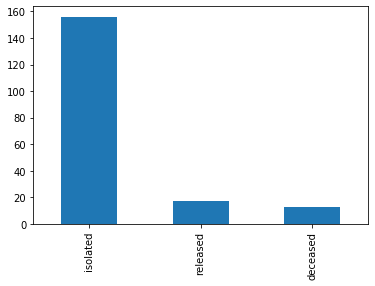

In [35]:
#Barchart showing the state of infected male patients in Korea
TKmale.state.value_counts().plot(kind = 'bar')

In [36]:
#The infection reason of the deceased patients
TKmale[TKmale.state == 'deceased'].infection_reason

53      NaN
54      NaN
102     NaN
106     NaN
113     NaN
285     NaN
297     NaN
442     NaN
619     NaN
1287    NaN
1442    NaN
2578    NaN
3895    NaN
Name: infection_reason, dtype: object

In [37]:
# State of female patients from korea
TKfemale.state.value_counts()

isolated    169
released     13
deceased      6
Name: state, dtype: int64

In [38]:
#Infection reasons of female patiets from Korea
print(TKfemale.infection_reason.unique())

['visit to Wuhan' 'contact with patient' 'visit to Thailand' nan
 'visit to Daegu' 'pilgrimage to Israel' 'visit to Italy']


In [39]:
#Total number of infection reasons 
len(TKfemale.infection_reason.unique())

7

In [40]:
#Grouping by infection reasons and present state of patients
TKfemale.groupby(TKfemale.infection_reason).state.value_counts()

infection_reason      state   
contact with patient  isolated    25
                      released     7
                      deceased     1
pilgrimage to Israel  isolated     3
visit to Daegu        isolated    20
visit to Italy        isolated     1
visit to Thailand     released     1
visit to Wuhan        released     1
Name: state, dtype: int64

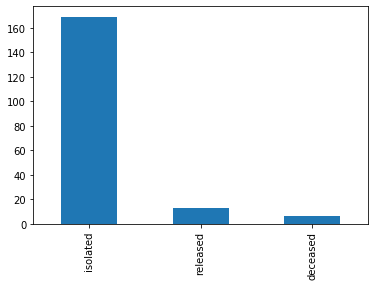

In [41]:
#Barchart showing the state of infected female patients in Korea
TKfemale.state.value_counts().plot(kind = 'bar')

In [42]:
#Number of deceased female from Korea
len(TKfemale[TKfemale.state == 'deceased'])

6

In [43]:
#Infection reasons of deceased female from korea
TKfemale[TKfemale.state == 'deceased'].infection_reason.unique()

array([nan, 'contact with patient'], dtype=object)

In [44]:
#Filtering by country(Mongolia)
Mongolia = df1[df1.country.isin(['Mongolia'])]
Mongolia.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
874,875,male,1984.0,Mongolia,capital area,NaN,NaN,NaN,NaN,NaN,2020-02-25,NaN,2020-02-25,deceased


In [45]:
#Number of patients from Mongolia
len(Mongolia)

1

In [46]:
#The state of patient from Mongolia
Mongolia.state

874    deceased
Name: state, dtype: object

In [47]:
df2 = pd.read_csv('route.csv')
df2.head()

,id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


In [ ]:
#Meaning of each column
id : The ID of the patient (n-th confirmed patient)
sex : The sex of the patient
birth_year : The birth year of the patient
country : The country of the patient
region : The region of the patient
group : The collective infection
infection_reason : The reason of infection
infection_order : The order of infection
infected_by : The ID of who has infected the patient
contact_number : The number of contacts with people
confirmed_date : The date of confirmation
released_date : The date of discharge
deceased_date : The date of decease
state : isolated / released / deceased

In [50]:
#Number of rows and columns
df2.shape

(68, 7)

In [51]:
# Sum of empty cells in 'route.csv'
df2.isna().sum()

id           0
date         0
province     0
city         0
visit        0
latitude     0
longitude    0
dtype: int64

In [52]:
#Type of each column
df2.dtypes

id             int64
date          object
province      object
city          object
visit         object
latitude     float64
longitude    float64
dtype: object

In [53]:
#Total amount of days contained in the data
from datetime import date
d0 = date(2020, 1, 19)
d1 = date(2020, 2, 2)
delta = d1-d0
print(delta.days)

14


In [54]:
df2.groupby('visit')['city'].value_counts()

visit              city         
airport            Jung-gu          7
                   Gimpo-si         3
bus_terminal       Pyeongtaek-si    1
cafe               Goyang-si        1
church             Jongno-gu        1
clinic             Bucheon-si       2
                   Gangnam-gu       1
                   Gunpo-si         1
                   Gunsan-si        1
                   Pyeongtaek-si    1
etc                Gangnam-gu       1
                   Goyang-si        1
                   Seongdong-gu     1
                   Suwon-si         1
hair_salon         Goyang-si        2
                   Seongbuk-gu      1
hospital           Bucheon-si       2
                   Gunsan-si        1
                   Jungnang-gu      1
                   Suwon-si         1
hospital_isolated  Jongno-gu        4
                   Seongnam-si      4
                   Jungnang-gu      3
                   Goyang-si        1
                   Jung-gu          1
                 

In [55]:
df2.sort_values('province').visit.value_counts()

hospital_isolated    14
airport              10
restaurant            8
clinic                6
hospital              5
train_station         4
etc                   4
hair_salon            3
movie_theater         3
market                3
hotel                 2
store                 2
cafe                  1
church                1
office                1
bus_terminal          1
Name: visit, dtype: int64

In [56]:
# Import the third data (time.csv)
df3 = pd.read_csv('time.csv')
df3.head()

,date,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
0,2020-01-20,1,0,1,0,0,1,0,1,0,0
1,2020-01-21,1,0,1,0,0,0,0,0,0,0
2,2020-01-22,4,3,1,0,0,3,3,0,0,0
3,2020-01-23,22,21,1,0,0,18,18,0,0,0
4,2020-01-24,27,25,2,0,0,5,4,1,0,0


In [ ]:
#Meaning of each column as contained in time.csv
acc_test : The accumulated number of tests
acc_negative : The accumulated number of negative results
acc_confirmed :The accumulated number of positive results
acc_released : The accumulated number of releases
acc_deceased : The accumulated number of deceases
new_test : The number of new tests
new_negative : The number of new negative results
new_confirmed : The number of new positive results
new_released : The number of new releases
new_deceased : The number of new deceases

In [58]:
# Total number of rows and columns (time.scv)
df3.shape

(43, 11)

In [59]:
#Total number of empty cells by column
df3.isna().sum()

date             0
acc_test         0
acc_negative     0
acc_confirmed    0
acc_released     0
acc_deceased     0
new_test         0
new_negative     0
new_confirmed    0
new_released     0
new_deceased     0
dtype: int64

In [60]:
#Total amount of days contained in time.csv
d3 = date(2020, 1, 20)
d4 = date(2020, 3,  2)
delta1 = d4-d3
print(delta1.days)

42


In [61]:
#Highest number of accumulated test
df3.acc_test.max()
   

125851

In [62]:
#Date at which  the highest number of test was carried out
df3[df3['acc_test'] == 125851]

,date,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
42,2020-03-02,125851,85484,4812,34,28,16260,13904,600,3,6


In [63]:
#Total number of accumulated test
agg_test = df3.acc_test.sum()
agg_test

764264

In [64]:
#Total number of accumulated test that yeilded negative result
agg_negative = df3.acc_negative.sum()
agg_negative

507470

In [65]:
# Percentage of accumulated result to accumulated test
(agg_negative/agg_test) *100

66.39983042508871

In [66]:
#Total number of confirmed result
agg_confirmed = df3.acc_confirmed.sum()
agg_confirmed

21213

In [67]:
#Percentage of accumulated confirmed result to accumulated test 
(agg_confirmed/agg_test)*100

2.7756115687772813

In [68]:
#Total number of released cases
agg_released = df3.acc_released.sum()
agg_released 

383

In [69]:
#Total number of deceased cases
agg_deceased =  df3.acc_deceased.sum()
agg_deceased

139

In [70]:
#Percentage number of deceased cases from confirmed cases
(agg_deceased/agg_confirmed ) *100

0.6552585678593316

In [71]:
df3.new_test.sum()

125851

In [72]:
df3.new_negative.sum()

85484

In [73]:
df3.new_confirmed.sum()

4812

In [74]:
df3.new_released.sum()

34

In [75]:
df3.new_deceased.sum()

28